# Loop 58 Analysis: CV-LB Relationship and Strategy Assessment

**Goal:** Analyze the CV-LB relationship and determine the best path forward to beat target 0.0347

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with actual LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print('Submission History with LB Scores:')
print(df.to_string(index=False))
print(f'\nBest CV: {df["cv"].min():.4f} (exp_030)')
print(f'Best LB: {df["lb"].min():.4f} (exp_030)')
print(f'Target: 0.0347')

Submission History with LB Scores:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


In [2]:
# CV-LB Linear Regression Analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print('='*60)
print('CV-LB LINEAR REGRESSION ANALYSIS')
print('='*60)
print(f'\nLinear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'\nINTERPRETATION:')
print(f'  - Even at CV=0, predicted LB would be {intercept:.4f}')
print(f'  - Target LB is 0.0347')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)? {intercept > 0.0347}')

if intercept > 0.0347:
    print(f'\n  *** CRITICAL: The intercept is HIGHER than the target! ***')
    print(f'  *** This means improving CV alone CANNOT reach the target ***')
else:
    required_cv = (0.0347 - intercept) / slope
    print(f'\n  Required CV to hit target: {required_cv:.6f}')
    print(f'  Current best CV: {df["cv"].min():.6f}')
    print(f'  Gap: {df["cv"].min() - required_cv:.6f}')

CV-LB LINEAR REGRESSION ANALYSIS

Linear fit: LB = 4.3147 * CV + 0.0525
R² = 0.9505
Intercept = 0.0525

INTERPRETATION:
  - Even at CV=0, predicted LB would be 0.0525
  - Target LB is 0.0347
  - Intercept (0.0525) > Target (0.0347)? True

  *** CRITICAL: The intercept is HIGHER than the target! ***
  *** This means improving CV alone CANNOT reach the target ***


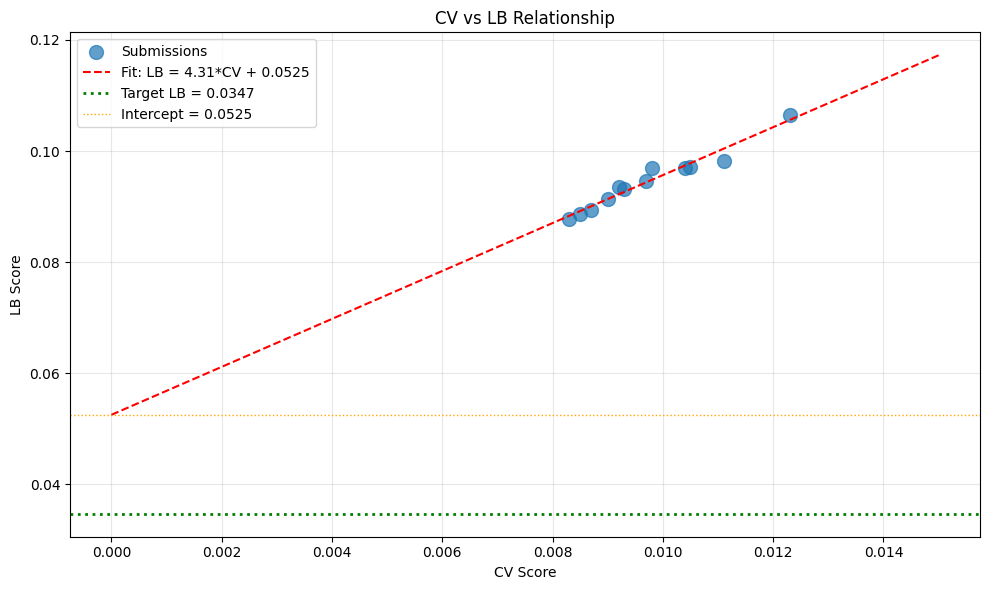

Saved to /home/code/exploration/cv_lb_relationship_loop58.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=1, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop58.png', dpi=100)
plt.show()
print('Saved to /home/code/exploration/cv_lb_relationship_loop58.png')

In [4]:
# Analyze the gap to target
print('='*60)
print('GAP ANALYSIS')
print('='*60)

best_lb = df['lb'].min()
target = 0.0347
gap = best_lb - target

print(f'\nBest LB achieved: {best_lb:.4f}')
print(f'Target: {target:.4f}')
print(f'Gap: {gap:.4f} ({gap/target*100:.1f}% above target)')

print(f'\nTo reach target with current CV-LB relationship:')
required_cv = (target - intercept) / slope
print(f'  Required CV: {required_cv:.6f}')
if required_cv < 0:
    print(f'  *** IMPOSSIBLE: Required CV is NEGATIVE ***')
    print(f'  *** The intercept ({intercept:.4f}) is higher than target ({target:.4f}) ***')
    print(f'  *** We need to CHANGE the CV-LB relationship, not just improve CV ***')

GAP ANALYSIS

Best LB achieved: 0.0877
Target: 0.0347
Gap: 0.0530 (152.7% above target)

To reach target with current CV-LB relationship:
  Required CV: -0.004130
  *** IMPOSSIBLE: Required CV is NEGATIVE ***
  *** The intercept (0.0525) is higher than target (0.0347) ***
  *** We need to CHANGE the CV-LB relationship, not just improve CV ***


In [5]:
# Pending submissions analysis
print('='*60)
print('PENDING SUBMISSIONS')
print('='*60)

pending = [
    {'exp': 'exp_049', 'cv': 0.0081},
    {'exp': 'exp_050', 'cv': 0.0081},
    {'exp': 'exp_052', 'cv': 0.0109},
    {'exp': 'exp_053', 'cv': 0.0081},
    {'exp': 'exp_054', 'cv': 0.0085},
    {'exp': 'exp_055', 'cv': 0.0085},
]

print('\nPending submissions (no LB feedback yet):')
for p in pending:
    predicted_lb = slope * p['cv'] + intercept
    print(f"  {p['exp']}: CV={p['cv']:.4f} -> Predicted LB={predicted_lb:.4f}")

print(f'\nNote: These submissions may have failed with "Evaluation metric raised an unexpected error"')
print('This suggests submission format issues that need investigation.')

PENDING SUBMISSIONS

Pending submissions (no LB feedback yet):
  exp_049: CV=0.0081 -> Predicted LB=0.0875
  exp_050: CV=0.0081 -> Predicted LB=0.0875
  exp_052: CV=0.0109 -> Predicted LB=0.0996
  exp_053: CV=0.0081 -> Predicted LB=0.0875
  exp_054: CV=0.0085 -> Predicted LB=0.0892
  exp_055: CV=0.0085 -> Predicted LB=0.0892

Note: These submissions may have failed with "Evaluation metric raised an unexpected error"
This suggests submission format issues that need investigation.


In [6]:
# Current experiment analysis
print('='*60)
print('CURRENT EXPERIMENT (exp_056)')
print('='*60)

current_cv = 0.009263
predicted_lb = slope * current_cv + intercept

print(f'\nexp_056 (Per-Target Model Selection):')
print(f'  CV: {current_cv:.6f}')
print(f'  Predicted LB: {predicted_lb:.4f}')
print(f'  Best LB so far: {best_lb:.4f}')
print(f'  Expected improvement: {best_lb - predicted_lb:.4f}')

if predicted_lb > best_lb:
    print(f'\n  *** WARNING: This approach is predicted to be WORSE than best ***')
    print(f'  *** CV ({current_cv:.4f}) is worse than best CV ({df["cv"].min():.4f}) ***')

CURRENT EXPERIMENT (exp_056)

exp_056 (Per-Target Model Selection):
  CV: 0.009263
  Predicted LB: 0.0925
  Best LB so far: 0.0877
  Expected improvement: -0.0048

  *** WARNING: This approach is predicted to be WORSE than best ***
  *** CV (0.0093) is worse than best CV (0.0083) ***


In [7]:
# Strategy assessment
print('='*60)
print('STRATEGY ASSESSMENT')
print('='*60)

print('\n1. CV-LB RELATIONSHIP:')
print(f'   - Linear fit: LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.2f})')
print(f'   - Intercept ({intercept:.4f}) is HIGHER than target ({target:.4f})')
print(f'   - This means: IMPROVING CV ALONE CANNOT REACH TARGET')

print('\n2. WHAT THIS MEANS:')
print('   - All our model improvements fall on the SAME CV-LB line')
print('   - The intercept represents STRUCTURAL distribution shift')
print('   - We need approaches that CHANGE the relationship, not just improve CV')

print('\n3. APPROACHES TO CHANGE THE RELATIONSHIP:')
print('   a) Extrapolation detection: Blend toward mean when extrapolating')
print('   b) Uncertainty-weighted predictions: Conservative when uncertain')
print('   c) Domain constraints: Physics-based rules that generalize')
print('   d) Solvent clustering: Class-specific models')
print('   e) Study top public kernels: They may have solved this')

print('\n4. REMAINING SUBMISSIONS: 5')
print('   - Use strategically to validate approaches that CHANGE the relationship')
print('   - Do NOT waste on incremental CV improvements')

STRATEGY ASSESSMENT

1. CV-LB RELATIONSHIP:
   - Linear fit: LB = 4.31*CV + 0.0525 (R²=0.95)
   - Intercept (0.0525) is HIGHER than target (0.0347)
   - This means: IMPROVING CV ALONE CANNOT REACH TARGET

2. WHAT THIS MEANS:
   - All our model improvements fall on the SAME CV-LB line
   - The intercept represents STRUCTURAL distribution shift
   - We need approaches that CHANGE the relationship, not just improve CV

3. APPROACHES TO CHANGE THE RELATIONSHIP:
   a) Extrapolation detection: Blend toward mean when extrapolating
   b) Uncertainty-weighted predictions: Conservative when uncertain
   c) Domain constraints: Physics-based rules that generalize
   d) Solvent clustering: Class-specific models
   e) Study top public kernels: They may have solved this

4. REMAINING SUBMISSIONS: 5
   - Use strategically to validate approaches that CHANGE the relationship
   - Do NOT waste on incremental CV improvements
